# 1. Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.signal import correlate
import plotly.graph_objects as go

# 2. Load data

In [2]:
merged = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/data/external/aisp_nivel_merged.csv', index_col=0, parse_dates=True)

# 3. Normalization

In [3]:
merged_copy = merged.copy()
merged_copy['aisp_std'] = (merged_copy['aisp'] - merged_copy['aisp'].mean()) / merged['aisp'].std()
merged_copy['nivel_std'] = (merged_copy['nivel'] - merged_copy['nivel'].mean()) / merged['nivel'].std()
merged_real=merged_copy[['aisp', 'nivel']]
merged_std=merged_copy[['aisp_std', 'nivel_std']]

# 4. Cross-Correlation

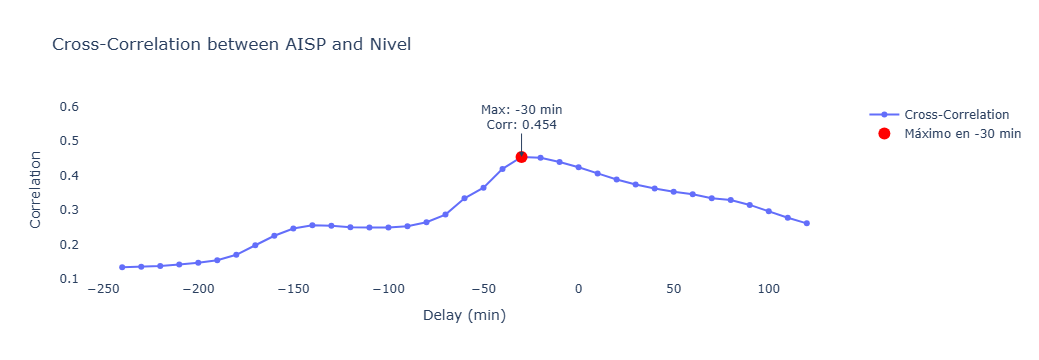

In [5]:
x = merged_std['nivel_std'].values
y = merged_std['aisp_std'].values

corr = correlate(x, y, mode='full')
lags = np.arange(-len(x) + 1, len(x))

norm_factor = np.array([len(x) - abs(lag) for lag in lags])
corr_norm = corr / norm_factor

lags_minutes = lags * 10

MIN_DELAY_MINUTES = -240  
MAX_DELAY_MINUTES = 120  

mask = (lags_minutes >= MIN_DELAY_MINUTES) & (lags_minutes <= MAX_DELAY_MINUTES)
lags_minutes_filtered = lags_minutes[mask]
corr_norm_filtered = corr_norm[mask]

best_idx = np.argmax(np.abs(corr_norm_filtered))
best_lag_minutes = lags_minutes_filtered[best_idx]
best_corr = corr_norm_filtered[best_idx]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=lags_minutes_filtered,
    y=corr_norm_filtered,
    mode='lines+markers',
    name='Cross-Correlation'
))
fig.add_trace(go.Scatter(
    x=[best_lag_minutes],
    y=[best_corr],
    mode='markers',
    marker=dict(color='red', size=12),
    name=f'Máximo en {best_lag_minutes} min'
))
fig.add_annotation(
    x=best_lag_minutes,
    y=best_corr,
    text=f"Max: {best_lag_minutes} min<br>Corr: {best_corr:.3f}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    bgcolor="white"
)

fig.update_layout(
    title="Cross-Correlation between AISP and Nivel",
    xaxis_title="Delay (min)",
    yaxis_title="Correlation",
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()